In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')


In [3]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [4]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [5]:
ee = solar.groupby(['hour']).mean().target
ee[:7] = 0
ee[20:] = 0
ee = ee * 2.5

In [6]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')
df.date_time = pd.to_datetime(df.date_time)

In [7]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [8]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [9]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

In [10]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']

In [11]:
import sys

In [12]:
sys.path.append('C:/Users/user/github/Capstone_Design/email/')

In [13]:
from all_function import *

In [20]:
best_position, best_fitness, before_price, before_optimal_price = cal_price(ee, qq, "spring")

Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46.92159924228998, 2525.4701233033015, 0, 0, 0, 2536.093144495332, 0, 0, 2287.5149225387095, 0, 0, 998.805060919247, 0, 0]
Best fitness: 4410600.709450357


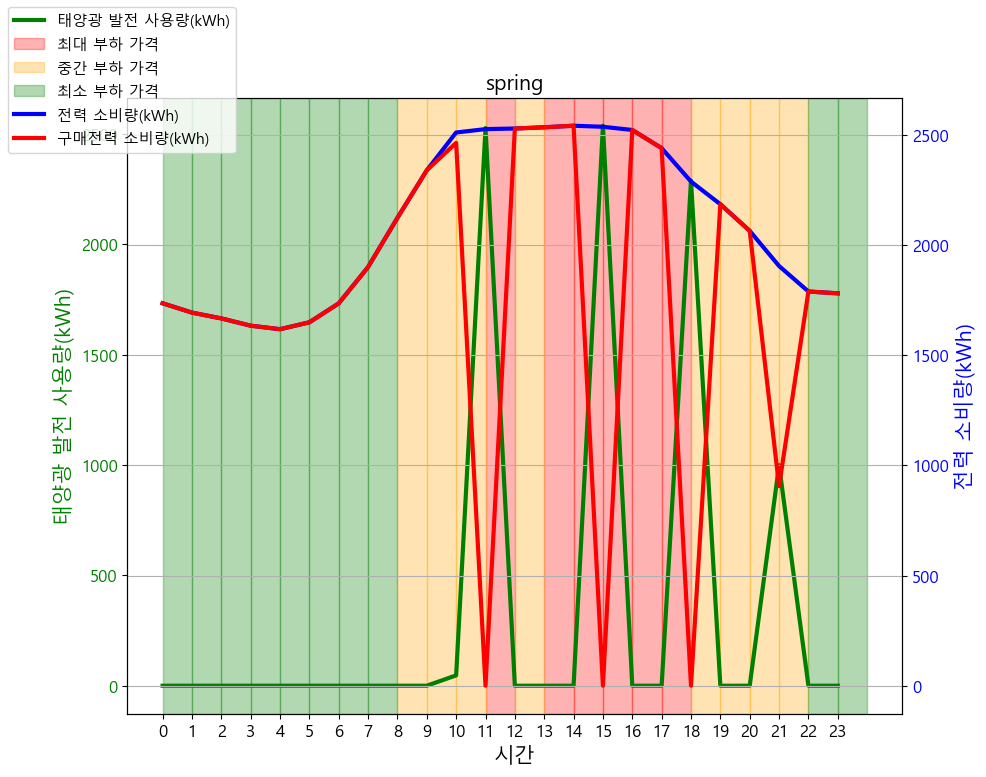

In [21]:
image_draw(qq, best_position, 'spring')

In [176]:
weather_list = ['spring', 'summer', 'fall', 'winter']
best_position_list = []
best_fitness_list = []
before_price_list = []

for k in range(5):
    for i in weather_list:
        best_position, best_fitness, before_price = cal_price(ee, qq, i)
        best_position_list.append(best_position)
        best_fitness_list.append(best_fitness)
        before_price_list.append(before_price)
    

Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2525.4701233033015, 0, 0, 0, 1103.3043215040732, 0, 2439.1406753203414, 2287.5149225387095, 0, 0, 0, 39.37479788535177, 0]
Best fitness: 4380591.641603599
Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 776.1361933737988, 0, 0, 0, 2536.093144495332, 2521.542452188425, 2439.1406753203414, 0, 0, 0, 121.89243386617653, 0, 0]
Best fitness: 5599687.347610527
Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2525.4701233033015, 0, 0, 0, 0, 2521.542452188425, 0, 1443.4390573802787, 0, 0, 1904.3532678381785, 0, 0]
Best fitness: 4436960.53937687
Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 666.6730548434953, 2525.4701233033015, 0, 578.9117348852665, 0, 0, 0, 2439.1406753203414, 0, 2184.609138687666, 0, 0, 0, 0]
Best fitness: 5493944.354370955
Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 756.8090388323595, 2540.8695911349905, 2536.093144495332, 0, 2439.1406753203414, 0, 0, 0, 121.89235618016974, 0, 0]
Best fitness: 4382239.002464054
Bes

In [177]:
before_price_list

[5536979.970352245,
 7434858.095643961,
 5536979.970352245,
 7101001.773278682,
 5536979.970352245,
 7434858.095643961,
 5536979.970352245,
 7101001.773278682,
 5536979.970352245,
 7434858.095643961,
 5536979.970352245,
 7101001.773278682,
 5536979.970352245,
 7434858.095643961,
 5536979.970352245,
 7101001.773278682,
 5536979.970352245,
 7434858.095643961,
 5536979.970352245,
 7101001.773278682]

In [178]:
np.array(before_price_list) - np.array(best_fitness_list) 

array([1156388.32874865, 1835170.74803343, 1100019.43097537,
       1607057.41890773, 1154740.96788819, 1835170.74276926,
       1154740.90372392, 1640344.87759872, 1157274.21700853,
       1551982.85713052, 1130913.59739672, 1420233.49790285,
       1157274.26487716, 1841945.51682069, 1157274.28145659,
       1617712.50002108, 1154740.84692035, 1841945.51478362,
       1157274.29307344, 1640343.41325861])

In [179]:
(np.array(before_price_list) - np.array(best_fitness_list)) / np.array(before_price_list) * 100

array([20.88482051, 24.68333255, 19.86677642, 22.63141836, 20.85506854,
       24.68333247, 20.85506738, 23.10018966, 20.90082   , 20.87441128,
       20.42473701, 20.00046674, 20.90082086, 24.77445424, 20.90082116,
       22.78146875, 20.85506636, 24.77445421, 20.90082137, 23.10016904])

In [180]:
spring_index = np.array([0, 4, 8, 12, 16])
summer_index = np.array([1, 5, 9, 13, 17])
fall_index = np.array([2, 6, 10, 14, 18])
winter_index = np.array([3, 7, 11, 15, 19])

In [181]:
best_fit_df = pd.DataFrame(best_fitness_list)

In [182]:
print(best_fit_df.loc[spring_index].mean())
print(best_fit_df.loc[summer_index].mean())
print(best_fit_df.loc[fall_index].mean())
print(best_fit_df.loc[winter_index].mean())

0    4.380896e+06
dtype: float64
0    5.653615e+06
dtype: float64
0    4.396935e+06
dtype: float64
0    5.515863e+06
dtype: float64


# 금액대에 따른 최적화 비율 확인

In [14]:
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')

In [18]:
real_weather

,지점,위도,경도,지점명,일시,기온,풍속,풍향,습도,강수량
0,90,38.2509,128.5647,속초,2021-01-01 00:00,-6.3,2.6,290.0,30.0,0.0
1,90,38.2509,128.5647,속초,2021-01-01 01:00,-6.7,4.3,320.0,30.0,0.0
2,90,38.2509,128.5647,속초,2021-01-01 02:00,-6.7,2.0,340.0,26.0,0.0
3,90,38.2509,128.5647,속초,2021-01-01 03:00,-7.2,1.3,320.0,25.0,0.0
4,90,38.2509,128.5647,속초,2021-01-01 04:00,-7.6,0.8,180.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1662115,295,34.8166,127.9264,남해,2022-12-30 20:00,3.5,1.7,290.0,52.0,0.0
1662116,295,34.8166,127.9264,남해,2022-12-30 21:00,2.3,1.4,270.0,60.0,0.0
1662117,295,34.8166,127.9264,남해,2022-12-30 22:00,0.8,1.1,270.0,67.0,0.0
1662118,295,34.8166,127.9264,남해,2022-12-30 23:00,0.8,0.7,290.0,65.0,0.0


In [19]:
weather = real_weather[real_weather['지점명'] =='속초']
weather['일시'] = pd.to_datetime(weather['일시'])
weather.set_index('일시', inplace=True, drop=True)
weather_eda = weather.loc[solar_eda.index.min():solar_eda.index.max()]
weather_eda.drop(['지점','위도','경도','지점명','풍향','습도','강수량'],axis = 1, inplace=True)

In [20]:
weather_eda.columns = ['temp_air','wind_speed']

In [15]:
import pvlib

In [16]:
longitude = 128.5647
latitude = 38.2509

location = pvlib.location.Location(latitude, longitude, 'ROK'): 해당 코드는 pvlib.location.Location 클래스를 사용하여 특정 위치에 대한 객체를 생성합니다. 여기서는 위도, 경도, 그리고 시간대('ROK'는 한국 시간대를 나타냅니다)를 인자로 전달하고 있습니다.

solpos = location.get_solarposition(times=pd.date_range(start=solar_eda.index.min(), end=solar_eda.index.max(), freq='1H')): 이 코드는 지정된 위치에서 특정 시간대의 태양 위치를 계산하는데 사용됩니다. 여기서는 '1H' 빈도로 설정된 시작 시간과 종료 시간 사이의 모든 시간에 대한 태양 위치를 계산합니다.

dni_extra = pvlib.irradiance.get_extra_radiation(solar_eda.index): 이 코드는 각 시간 단위에 대한 외부 대기에서의 태양 복사량을 계산합니다.

airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']): 태양의 고도 각에 대한 상대적인 대기 질량을 계산합니다. 대기 질량은 태양 광선이 지구 대기를 통과하는 길이를 측정한 값입니다.

pressure = pvlib.atmosphere.alt2pres(location.altitude): 대기압을 계산하는 코드입니다. 이는 고도에 따라 달라집니다.

am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure): 절대 대기 질량을 계산합니다. 이는 상대 대기 질량과 대기압을 이용하여 계산됩니다.

tl = pvlib.clearsky.lookup_linke_turbidity(solpos.index, latitude, longitude): Linke 탁도를 조회합니다. 이 값은 대기 중의 에어로졸과 먼지의 양을 나타내며, 광선이 대기를 통과하는 과정에서 얼마나 많은 산란이 발생하는지를 나타냅니다.

solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl): Simplified Solis 모델을 사용하여 태양 광선이 탁한 대기를 통과한 후의 복사량을 계산합니다. 복사량은 GHI (Global Horizontal Irradiance, 전체 수평 복사량), DNI (Direct Normal Irradiance, 직접 정규 복사량), DHI (Diffuse Horizontal Irradiance, 확산 수평 복사량)로 표현됩니다.

cs = location.get_clearsky(solpos.index, model='simplified_solis'): 해당 위치에 대한 clear sky (구름 없는 하늘)의 GHI, DNI, DHI를 얻습니다. 모델은 'simplified_solis'로 설정되어 있습니다.

system = pvlib.pvsystem.PVSystem(...): PV 시스템을 정의하는 코드입니다. 특히 여기서는 설치 각도, 방위각, 모듈과 인버터의 파라미터, 문자열 및 인버터의 수, 그리고 온도 모델의 파라미터 등을 설정합니다.

mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss'): ModelChain은 전체 시스템의 행동을 예측하는 모델을 나타냅니다. 여기서는 spectral_model과 aoi_model을 no_loss로 설정하여 이들 요소가 발전량에 미치는 영향을 무시하도록 설정했습니다. 여기서 'aoi'는 'angle of incidence'로, 태양 광선이 PV 모듈에 닿는 각도를 나타냅니다.

surface_tilt: 태양광 모듈의 기울기를 나타내며, 각도로 표현됩니다. 여기서는 30도로 설정되어 있습니다.

surface_azimuth: 태양광 모듈의 방위각을 나타냅니다. 여기서는 180도로 설정되어 있습니다.

module_parameters: 태양광 모듈의 세부 사항을 나타내는 딕셔너리입니다. 여기서는 pdc0(모듈의 공칭 DC 출력)가 1000W, gamma_pdc(공칭 DC 출력에 대한 온도 계수)가 -0.004로 설정되어 있습니다.

inverter_parameters: 인버터의 세부 사항을 나타내는 딕셔너리입니다. 여기서는 pdc0(인버터의 최대 DC 입력)가 1000W로 설정되어 있습니다.

modules_per_string: 한 문자열 당 모듈 수를 나타냅니다. 여기서는 1로 설정되어 있습니다.

strings_per_inverter: 한 인버터 당 문자열 수를 나타냅니다. 여기서는 1로 설정되어 있습니다.

temperature_model_parameters: 모듈 온도를 계산하기 위한 파라미터를 나타내는 딕셔너리입니다. 여기서는 a, b, deltaT 세 가지 파라미터가 사용되었습니다. 이들 파라미터는 일반적으로 'open circuit voltage' (v_oc)를 사용하는 온도 모델에 사용됩니다.

In [21]:
longitude = 128.5647
latitude = 38.2509

# 위치와 타임존을 설정합니다.
location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

# 일일 일사량을 구합니다.
times = pd.date_range(start=weather_eda.index.min(), end=weather_eda.index.max(), freq='1H', tz='Asia/Seoul')
solpos = location.get_solarposition(times=times)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(location.altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

# Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
cs = location.get_clearsky(times, model='simplified_solis')

# 발전량을 계산합니다.
system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                 module_parameters={'pdc0': 5000, 'gamma_pdc': -0.004}, 
                                 inverter_parameters={'pdc0': 5000},
                                 modules_per_string=1, strings_per_inverter=1,
                                 temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')


In [22]:
weather_eda.index = weather_eda.index.tz_localize('Asia/Seoul')

In [25]:
mc.run_model(pd.concat([solis_clearsky, weather_eda], axis=1))

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: pvwatts_dc
  ac_model: pvwatts_inverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [26]:
generation = pd.DataFrame(mc.ac)

In [27]:
generation['hour'] = generation.index.hour
generation['month'] = generation.index.month
generation['year'] = generation.index.year
generation['day'] = generation.index.day


In [28]:
generation.groupby(['hour']).mean()['p_mp']

hour
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7       12.310682
8      151.642153
9      437.836174
10     766.848975
11     971.278626
12    1031.180073
13    1030.952583
14     962.806225
15     746.656060
16     413.881081
17     130.793465
18       7.522104
19       0.000000
20       0.000000
21       0.000000
22       0.000000
23       0.000000
Name: p_mp, dtype: float64

In [31]:
def clear_sky_model_pred(longitude, latitude, capacity, weather):
    """
    input :
        longitude : 경도
        latitude : 위도
        capacity : 용량(단위 : w)
        weather : 날씨 데이터 (index가 날짜인 데이터)
    output :
        generation : 발전량
    """
    location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')
    start_date = weather.index.min()
    end_date = weather.index.max()

    times = pd.date_range(start = start_date, end = end_date, freq='1H', tz = 'Asia/Seoul')
    solpos = location.get_solarposition(times=times)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(location.altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
    tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

    solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
    cs = location.get_clearsky(times, model='simplified_solis')

    system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                    module_parameters={'pdc0': capacity, 'gamma_pdc': -0.004}, 
                                    inverter_parameters={'pdc0': capacity},
                                    modules_per_string=1, strings_per_inverter=1,
                                    temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
    mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

    mc.run_model(pd.concat([solis_clearsky, weather], axis=1))

    return pd.DataFrame(mc.ac)


In [1]:
def cloudy_sky_model_pred(longitude, latitude, capacity, weather):
    """
    input :
        longitude : 경도
        latitude : 위도
        capacity : 용량(단위 : w)
        weather : 날씨 데이터 (index가 날짜인 데이터)
    output :
        generation : 발전량
    """
    location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')
    start_date = weather.index.min()
    end_date = weather.index.max()

    # cloudiness를 [0, 1] 범위로 정규화
    weather["cloudiness"] = weather["cloudiness"] / weather["cloudiness"].max()

    # cloudiness를 이용해 global horizontal irradiance (ghi)를 계산
    clear_sky = location.get_clearsky(weather.index, model='simplified_solis')
    weather["ghi"] = clear_sky["ghi"] * (1 - weather["cloudiness"])

    system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                    module_parameters={'pdc0': capacity, 'gamma_pdc': -0.004}, 
                                    inverter_parameters={'pdc0': capacity},
                                    modules_per_string=1, strings_per_inverter=1,
                                    temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
    mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

    mc.run_model(weather)

    return pd.DataFrame(mc.ac)


In [32]:
def group_by_means(df):
    df['hour'] = df.index.hour
    return df.groupby(['hour']).mean()

In [33]:
group_by_means(clear_sky_model_pred(128.5647, 38.2509, 10000, weather_eda)) * 3 / 10

,p_mp
hour,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,7.386409
8,90.985292


In [198]:
from tqdm import tqdm

In [200]:
weather_list = ['spring', 'summer', 'fall', 'winter']
position_list = []
fitness_list = []
price_list = []
before_optimal_list = []


for k in tqdm(range(0, 10, 3)):
    q = clear_sky_model_pred(128.5647, 38.2509, 10000, weather_eda)

    using = group_by_means(q)
    
    using_scale = using * (k + 1) / 10
    
    for j in range(2):
        # 데이터프레임에 각 결과 저장
        for i in weather_list:
            best_position, best_fitness, before_price, before_optimal = cal_price(using_scale.values, qq, i)
            
            # 결과를 하나의 행에 저장
            position_list.append(best_position)
            fitness_list.append(best_fitness)
            price_list.append(before_price)
            before_optimal_list.append(before_optimal)
    

  0%|          | 0/4 [00:57<?, ?it/s]

Best position: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1305.077986287285, 0, 0, 0, 27.663531854132877, 0, 0, 0]
Best fitness: 5353910.911276651


ValueError: not enough values to unpack (expected 4, got 3)

In [34]:
dd = pd.read_csv('C:\\Users\\user\\Downloads\\2010-2011 Solar home electricity data(all).csv')

In [44]:
dd.set_index('date', inplace=True, drop=True)

In [46]:
dd.index = pd.to_datetime(dd.index)

In [47]:
dd

,Customer,Postcode,Generator Capacity,Consumption Category,Load(kWh)
date,,,,,
2010-07-01 00:30:00,1.0,2076.0,3.78,CL,1.250
2010-07-01 01:00:00,1.0,2076.0,3.78,CL,1.244
2010-07-01 01:30:00,1.0,2076.0,3.78,CL,1.256
2010-07-01 02:00:00,1.0,2076.0,3.78,CL,0.744
2010-07-01 02:30:00,1.0,2076.0,3.78,CL,0.019
...,...,...,...,...,...
2011-06-30 22:00:00,300.0,2086.0,3.36,GG,0.000
2011-06-30 22:30:00,300.0,2086.0,3.36,GG,0.000
2011-06-30 23:00:00,300.0,2086.0,3.36,GG,0.000


In [50]:
dd['Consumption Category'].unique()

array(['CL', 'GC', 'GG'], dtype=object)

In [86]:
postcode = pd.read_csv('C:\\Users\\user\\github\\Data\\block_chain\\customer_location_eda.csv')

In [87]:
postcode

,postcode,X(latitude),Y(longitude)
0,2008,-33.887887,151.196403
1,2010,-33.882559,151.213158
2,2018,-33.921990,151.207330
3,2021,-33.892120,151.230645
4,2025,-33.886500,151.243761
...,...,...,...
95,2321,-32.691654,151.443547
96,2324,-32.640042,151.911142
97,2325,-32.938053,151.186933
98,2326,-32.787791,151.455221


In [58]:
dd[(dd['Consumption Category'] == 'GG') | (dd['Consumption Category'] == 'GC')].to_csv('./GG_GC_data.csv', index=False)

In [66]:
GG_GC = dd[(dd['Consumption Category'] == 'GG') | (dd['Consumption Category'] == 'GC')]

In [97]:
GG_GC.reset_index(inplace=True)

In [99]:
GG_GC['Customer'] = GG_GC['Customer'].astype('int32')
GG_GC['Postcode'] = GG_GC['Postcode'].astype('int32')
GG_GC['Generator Capacity'] = GG_GC['Generator Capacity'].astype('float32')
GG_GC['Load(kWh)'] = GG_GC['Load(kWh)'].astype('float32')

In [125]:
chunks = np.array_split(GG_GC, 20)

merged_chunks = [pd.merge(chunk, postcode, left_on='Postcode', right_on=' postcode ',how='inner') for chunk in chunks]

# 모든 병합된 청크를 하나의 데이터프레임으로 결합
df_final = pd.concat(merged_chunks, ignore_index=True)

In [126]:
df_final.drop([' postcode '], axis=1, inplace=True)

In [128]:
df_final

,date,Customer,Postcode,Generator Capacity,Consumption Category,Load(kWh),X(latitude),Y(longitude)
0,2010-07-01 00:30:00,1,2076,3.78,GC,0.303,-33.708586,151.122843
1,2010-07-01 01:00:00,1,2076,3.78,GC,0.471,-33.708586,151.122843
2,2010-07-01 01:30:00,1,2076,3.78,GC,0.083,-33.708586,151.122843
3,2010-07-01 02:00:00,1,2076,3.78,GC,0.121,-33.708586,151.122843
4,2010-07-01 02:30:00,1,2076,3.78,GC,0.361,-33.708586,151.122843
...,...,...,...,...,...,...,...,...
10511995,2011-06-30 22:00:00,300,2086,3.36,GG,0.000,-33.747307,151.224816
10511996,2011-06-30 22:30:00,300,2086,3.36,GG,0.000,-33.747307,151.224816
10511997,2011-06-30 23:00:00,300,2086,3.36,GG,0.000,-33.747307,151.224816
10511998,2011-06-30 23:30:00,300,2086,3.36,GG,0.000,-33.747307,151.224816


In [129]:
df_final['hour'] = df_final['date'].dt.hour
df_final['month'] = df_final['date'].dt.month
df_final['year'] = df_final['date'].dt.year
df_final['day'] = df_final['date'].dt.day

In [130]:
ddd = df_final.groupby(['year','month','day','hour','Customer','Postcode','Generator Capacity','X(latitude)','Y(longitude)']).sum().reset_index()

In [131]:
ddd

,year,month,day,hour,Customer,Postcode,Generator Capacity,X(latitude),Y(longitude),Load(kWh)
0,2010,7,1,0,1,2076,3.78,-33.708586,151.122843,0.303
1,2010,7,1,0,2,2259,1.62,-33.205946,151.350186,0.085
2,2010,7,1,0,3,2263,1.00,-33.250436,151.507765,0.669
3,2010,7,1,0,4,2220,1.00,-33.958369,151.099545,0.075
4,2010,7,1,0,5,2261,1.00,-33.360333,151.431874,0.000
...,...,...,...,...,...,...,...,...,...,...
2628295,2011,7,1,0,296,2087,1.08,-33.773259,151.216073,0.045
2628296,2011,7,1,0,297,2261,1.50,-33.360333,151.431874,0.317
2628297,2011,7,1,0,298,2216,1.02,-33.953140,151.149058,0.187
2628298,2011,7,1,0,299,2076,1.00,-33.708586,151.122843,0.145


In [161]:
ddd['time'] = pd.to_datetime(ddd['year'].astype(str) + '-' + ddd['month'].astype(str).str.zfill(2) + '-' + ddd['day'].astype(str).str.zfill(2) + ' ' + ddd['hour'].astype(str).str.zfill(2) + ':00:00')

In [162]:
ddd

,year,month,day,hour,Customer,Postcode,Generator Capacity,X(latitude),Y(longitude),Load(kWh),time
0,2010,7,1,0,1,2076,3.78,-33.708586,151.122843,0.303,2010-07-01
1,2010,7,1,0,2,2259,1.62,-33.205946,151.350186,0.085,2010-07-01
2,2010,7,1,0,3,2263,1.00,-33.250436,151.507765,0.669,2010-07-01
3,2010,7,1,0,4,2220,1.00,-33.958369,151.099545,0.075,2010-07-01
4,2010,7,1,0,5,2261,1.00,-33.360333,151.431874,0.000,2010-07-01
...,...,...,...,...,...,...,...,...,...,...,...
2628295,2011,7,1,0,296,2087,1.08,-33.773259,151.216073,0.045,2011-07-01
2628296,2011,7,1,0,297,2261,1.50,-33.360333,151.431874,0.317,2011-07-01
2628297,2011,7,1,0,298,2216,1.02,-33.953140,151.149058,0.187,2011-07-01
2628298,2011,7,1,0,299,2076,1.00,-33.708586,151.122843,0.145,2011-07-01


In [134]:
df_final.to_csv('./GG_GC_data.csv', index=False)

KeyboardInterrupt: 